In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import utils

# define the submission/grader object for this exercise
grader = utils.Grader()

In [18]:
training_data = np.loadtxt('/Users/advaithsai/ml-coursera/ex2/ex2data1.txt',delimiter=',')
target = training_data[:,2]
feature = training_data[:, 0:2]

In [19]:
def plotData(X,y):
  fig = plt.figure()
  # Find Indices of Positive and Negative Examples
  pos = y == 1
  neg = y == 0
  # Plot Examples
  plt.scatter(X[pos, 0], X[pos, 1], color='r')
  plt.scatter(X[neg, 0], X[neg, 1], color='b')

Text(0, 0.5, 'Exam 2 score')

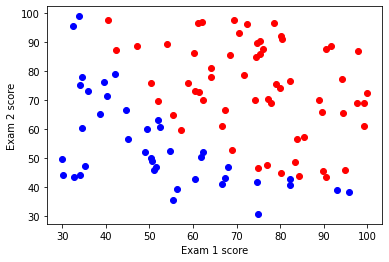

In [20]:
plotData(feature,target)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

In [21]:
import math
def sigmoid(z):
  z = np.array(z)
  g = np.zeros(z.shape)
  g = 1 / (1 + np.exp(-z))
  return g 

In [0]:


# appends the implemented function in part 1 to the grader object
grader[1] = sigmoid

# send the added functions to coursera grader for getting a grade on this part
grader.grade()




Submitting Solutions | Programming Exercise logistic-regression

Login (email address): advaith.maddipatla@gmail.com
Token: pgCu2sEJhdxJc5qx
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Sigmoid Function |   5 /   5 | Nice work!
                   Logistic Regression Cost |   0 /  30 | 
               Logistic Regression Gradient |   0 /  30 | 
                                    Predict |   0 /   5 | 
       Regularized Logistic Regression Cost |   0 /  15 | 
   Regularized Logistic Regression Gradient |   0 /  15 | 
                                  --------------------------------
                                            |   5 / 100 |  



In [22]:
m,n = feature.shape
feature = np.concatenate([np.ones((m, 1)), feature], axis=1)

In [23]:
def costFunction(theta,X,y):
  m = y.size
  J = 0
  grad = np.zeros(theta.shape)
  def computeCost(x,y):
    sum_diff = 0
    for i in range(m):
      h_x = sigmoid(np.dot(theta,x[i]))
      sum_diff += -y[i]*math.log(h_x) - (1-y[i])*math.log(1-h_x)
    return sum_diff/m

  def computeGrad(x,y,j):
    sum_Gradient = 0
    for i in range(m):
      h_x = sigmoid(np.dot(theta,x[i]))
      sum_Gradient += (h_x-y[i])*x[i][j]
    return sum_Gradient/m
  
  for i in range(grad.shape[0]):
    grad[i] = computeGrad(X,y,i)

  J = computeCost(X,y)
  
  return J,grad

In [25]:
initial_theta = np.zeros(n+1)
cost, grad = costFunction(initial_theta, feature, target)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, feature, target)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


In [0]:
grader[2] = costFunction
grader[3] = costFunction
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Sigmoid Function |   5 /   5 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |  30 /  30 | Nice work!
                                    Predict |   0 /   5 | 
       Regularized Logistic Regression Cost |   0 /  15 | 
   Regularized Logistic Regression Gradient |   0 /  15 | 
                                  --------------------------------
                                            |  65 / 100 |  



In [26]:
options = {'maxiter':400}
res = optimize.minimize(costFunction,
                        initial_theta,
                        (feature, target),
                        jac=True,
                        method='TNC',
                        options=options)
cost = res.fun
theta = res.x
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


In [27]:
def plotDecisionBoundary(plotData, theta, X, y):
  theta = np.array(theta)

  # Plot Data (remember first column in X is the intercept)
  plotData(X[:, 1:3], y)

  if X.shape[1] <= 3:
      # Only need 2 points to define a line, so choose two endpoints
      plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

      # Calculate the decision boundary line
      plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

      # Plot, and adjust axes for better viewing
      plt.plot(plot_x, plot_y)

      # Legend, specific for the exercise
      plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
      plt.xlim([30, 100])
      plt.ylim([30, 100])
  else:
      # Here is the grid range
      u = np.linspace(-1, 1.5, 50)
      v = np.linspace(-1, 1.5, 50)

      z = np.zeros((u.size, v.size))
      # Evaluate z = theta*x over the grid
      for i, ui in enumerate(u):
          for j, vj in enumerate(v):
              z[i, j] = np.dot(mapFeature(ui, vj), theta)

      z = z.T  # important to transpose z before calling contour
      # print(z)

      # Plot z = 0
      plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
      plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

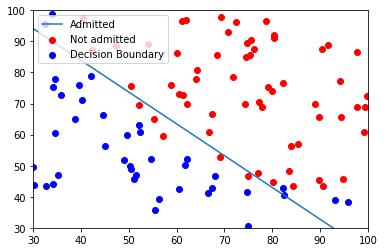

In [28]:
plotDecisionBoundary(plotData, theta, feature, target)

In [29]:
def predict(theta, X):
  m = X.shape[0]
  
  p = np.zeros(m)
  for i in range(m):
    if (sigmoid(np.dot(theta,X[i]))>=0.5):
      p[i] = 1
    else:
      p[i] = 0
  return p

In [ ]:
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

p = predict(theta, feature)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == target) * 100))
print('Expected accuracy (approx): 89.00 %')

In [0]:
grader[4] = predict
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Sigmoid Function |   5 /   5 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |  30 /  30 | Nice work!
                                    Predict |   5 /   5 | Nice work!
       Regularized Logistic Regression Cost |   0 /  15 | 
   Regularized Logistic Regression Gradient |   0 /  15 | 
                                  --------------------------------
                                            |  70 / 100 |  



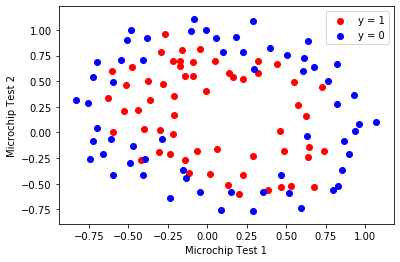

In [10]:
training = np.loadtxt('/Users/advaithsai/ml-coursera/ex2/ex2data2.txt',delimiter=',')
X = training[:, :2]
y = training[:,2]
plotData(X,y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'], loc='upper right')

In [11]:
def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.
    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.
    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.
    degree: int, optional
        The polynomial degree.
    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [12]:
X = mapFeature(X[:, 0], X[:, 1])

In [ ]:
def costFunctionReg(theta,X,y,lambda_):
  m = y.size
  J = 0
  grad = np.zeros(theta.shape)

  def theta_sums(theta):
    sums = 0
    for i in range(1,theta.shape[0]):
      sums += theta[i]*theta[i]
    return (sums*lambda_)/(2*m)

  def computeCost(x,y):
    sum_diff = 0
    for i in range(m):
      h_x = sigmoid(np.dot(theta,x[i]))
      sum_diff += -y[i]*math.log(h_x) - (1-y[i])*math.log(1-h_x)
    
    return (sum_diff/m)
  
  def computeGrad(x,y,j):
    sum_Gradient = 0
    for i in range(m):
      h_x = sigmoid(np.dot(theta,x[i]))
      sum_Gradient += (h_x-y[i])*x[i][j]
    return sum_Gradient/m
  
  for i in range(grad.shape[0]):
    if i >= 1:
      grad[i] = computeGrad(X,y,i) + (theta[i]*lambda_)/m
    else:
      grad[i] = computeGrad(X,y,i)

  J = computeCost(X,y) + theta_sums(theta)
  
  return J,grad

In [0]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')

# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.16
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


In [0]:
grader[5] = costFunctionReg
grader[6] = costFunctionReg
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Sigmoid Function |   5 /   5 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |  30 /  30 | Nice work!
                                    Predict |   5 /   5 | Nice work!
       Regularized Logistic Regression Cost |  15 /  15 | Nice work!
   Regularized Logistic Regression Gradient |  15 /  15 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  



Train Accuracy: 83.9 %
Expected accuracy (with lambda = 1): 83.1 % (approx)



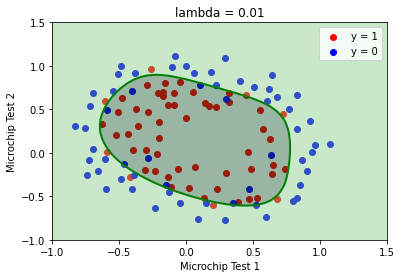

In [0]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 0.01

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

plotDecisionBoundary(plotData, theta, X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.grid(False)
plt.title('lambda = %0.2f' % lambda_)

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')